<a href="https://colab.research.google.com/github/Nailloon/Machine-Learning-Practice/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B%20%D0%AE%D0%B4%D0%B8%D0%BD%D1%86%D0%B5%D0%B2%D0%BE%D0%B9%20%D0%9D%D0%B0%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B/%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

##Задание 1

In [ ]:
data1 = make_blobs(n_samples=200, n_features=2, centers=2)
data2 = make_blobs(n_samples=400, n_features=2, centers=3)
data3 = make_blobs(n_samples=500, n_features=2, centers=4)

##Задание 2

1. визуализировать датасет
2. выполнить кластеризацию с помощью алгоритма KMeans
3. визуализировать центроид + цветом обозначить принадлежность точки кластеру
4. подобрать оптимальное количество кластеров по значению суммы квадратов расстояний до центроидов
5. подобрать оптимальное количество кластеров по значению коэффициента силуета
6. выполнить кластеризацию с помощью DBSCAN тремя способами (самостоятельно задать или подобрать 3 пары параметров для этого алгоритма)

Датасет 1

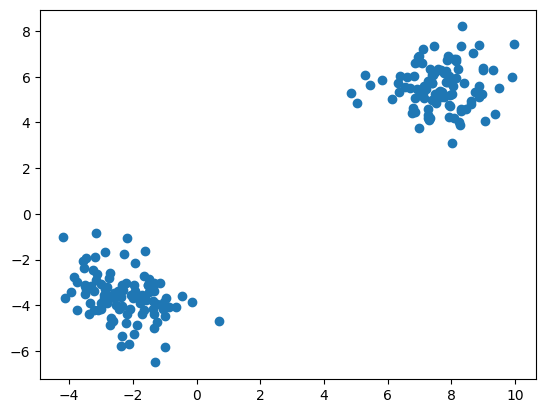

In [ ]:
plt.scatter(data1[0][:,0], data1[0][:,1])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_1 = KMeans(2, n_init='auto').fit(data1[0])

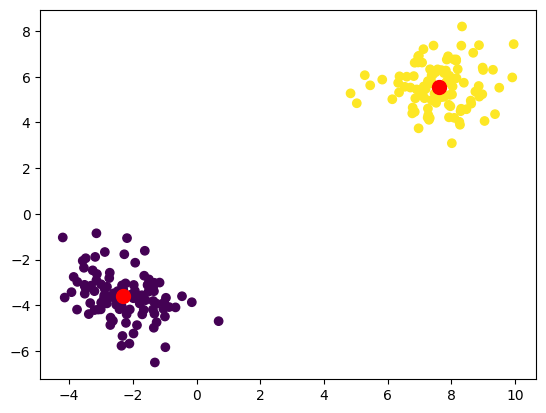

In [ ]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=kmeans_1.labels_)
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s=100, c='red')

In [ ]:
inertias1 = []

for i in range(2, 11):
  km = KMeans(i, n_init='auto').fit(data1[0])
  inertias1.append(km.inertia_)

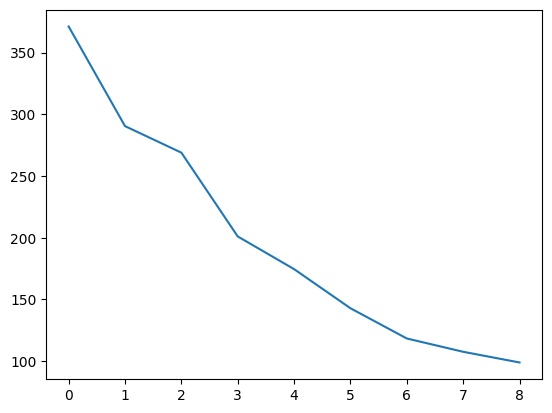

In [ ]:
plt.plot(inertias1)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(data1[0], kmeans_1.labels_)

0.8737270856876953

In [ ]:
ss1 = []

for i in range(2, 11):
  ss1.append(silhouette_score(data1[0], KMeans(i, n_init='auto').fit(data1[0]).labels_))

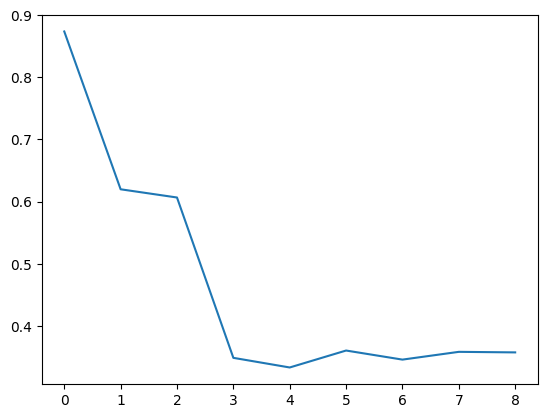

In [ ]:
plt.plot(ss1)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN().fit(data1[0])
print(np.unique(dbscan.labels_))

[-1  0  1]


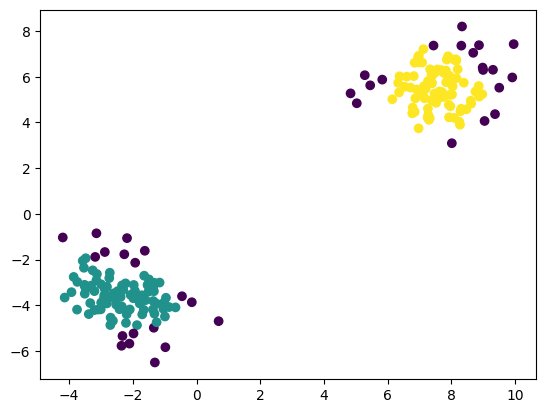

In [ ]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=4).fit(data1[0])
print(np.unique(dbscan.labels_))

[-1  0  1  2  3  4  5  6  7  8  9]


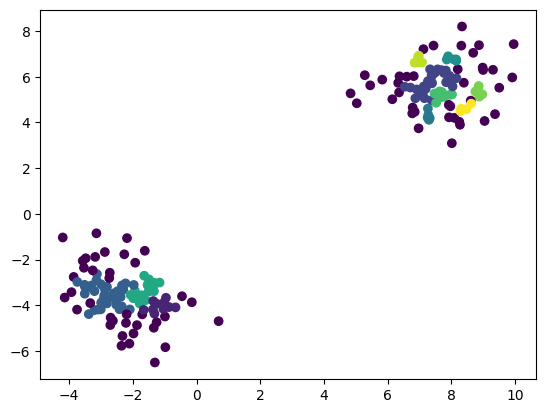

In [ ]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data1[0])
distances, indices = nbrs.kneighbors(data1[0])

In [ ]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

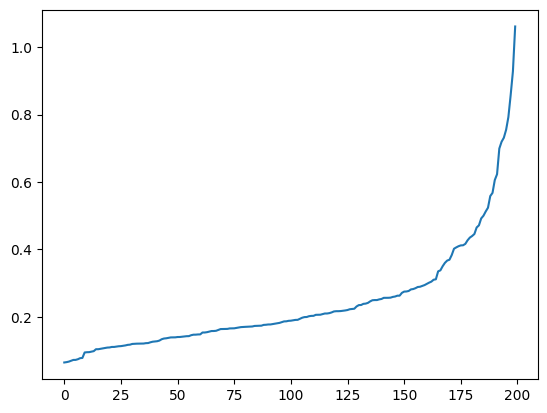

In [ ]:
plt.plot(distances)

[-1  0  1]


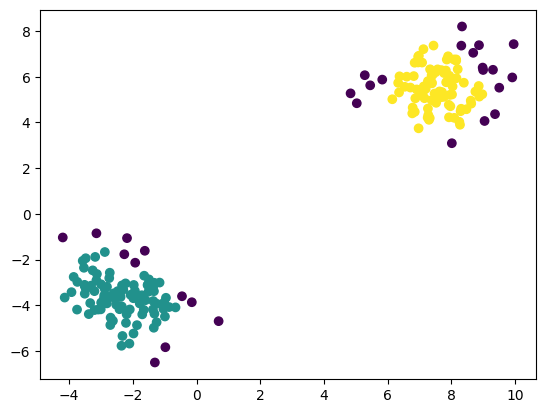

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(data1[0])
print(np.unique(dbscan.labels_))
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

[-1  0  1]


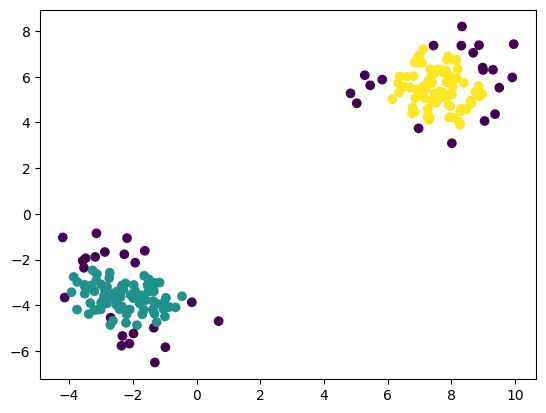

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=5, metric='manhattan').fit(data1[0])
print(np.unique(dbscan.labels_))
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

Датасет 2

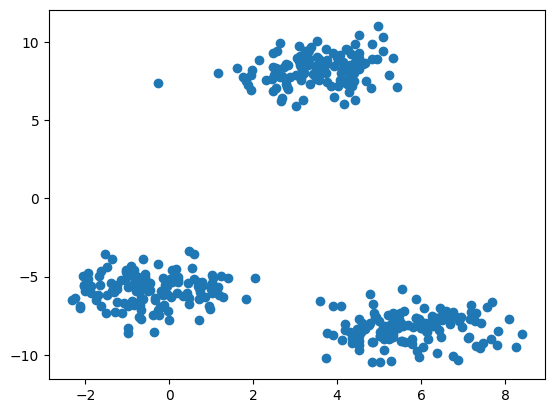

In [ ]:
plt.scatter(data2[0][:,0], data2[0][:,1])

In [ ]:
kmeans_2 = KMeans(3, n_init='auto').fit(data2[0])

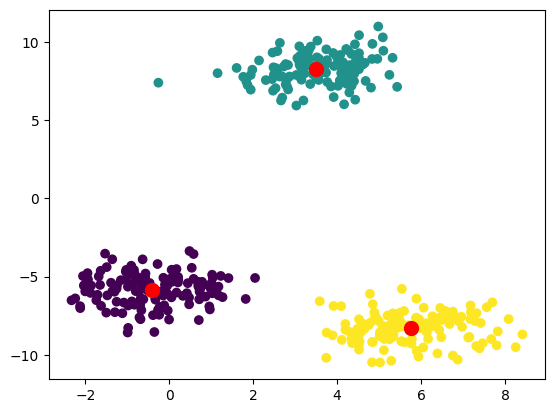

In [ ]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=kmeans_2.labels_)
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s=100, c='red')

In [ ]:
inertias2 = []

for i in range(2, 11):
  km = KMeans(i, n_init='auto').fit(data2[0])
  inertias2.append(km.inertia_)

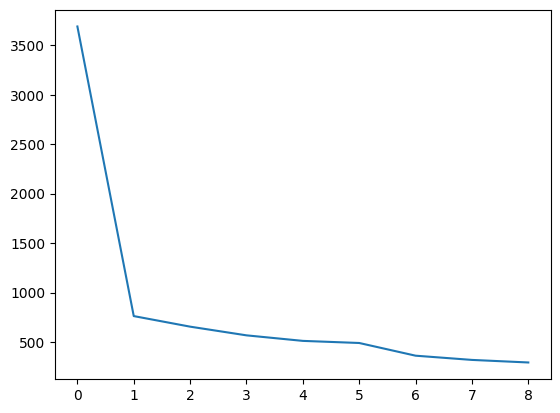

In [ ]:
plt.plot(inertias2)

In [ ]:
silhouette_score(data2[0], kmeans_2.labels_)

0.7836545292316114

In [ ]:
ss2 = []

for i in range(2, 11):
  ss2.append(silhouette_score(data2[0], KMeans(i, n_init='auto').fit(data2[0]).labels_))

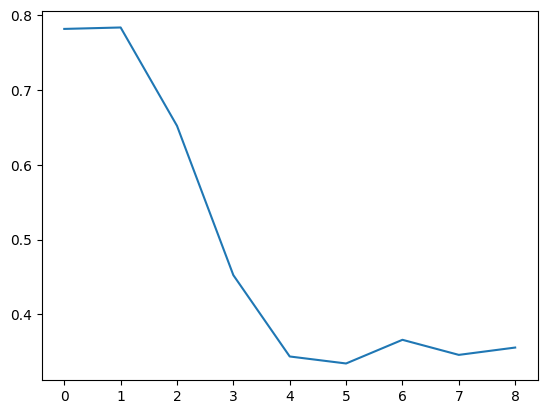

In [ ]:
plt.plot(ss2)

In [ ]:
dbscan = DBSCAN().fit(data2[0])
print(np.unique(dbscan.labels_))

[-1  0  1  2  3]


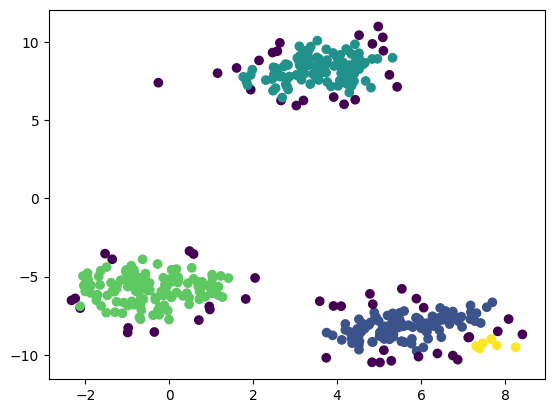

In [ ]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


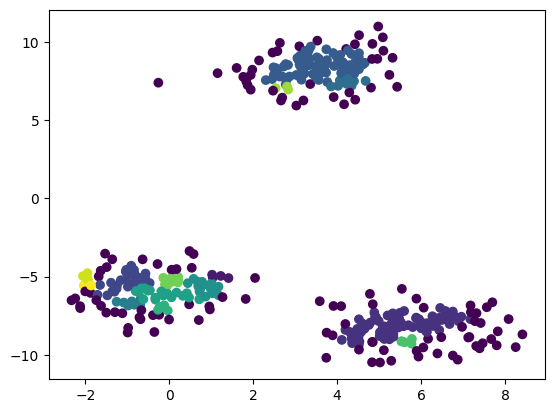

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=4).fit(data2[0])
print(np.unique(dbscan.labels_))
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

In [ ]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data2[0])
distances, indices = nbrs.kneighbors(data2[0])

In [ ]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

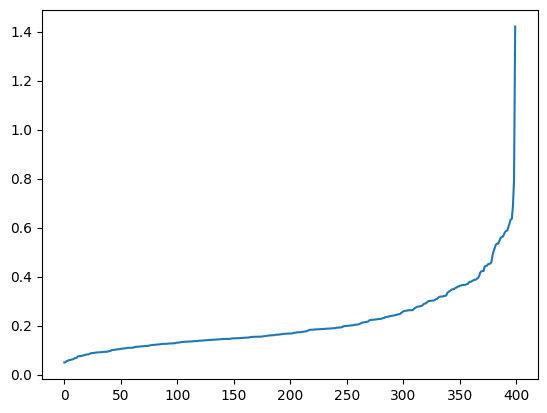

In [ ]:
plt.plot(distances)

[-1  0  1  2  3]


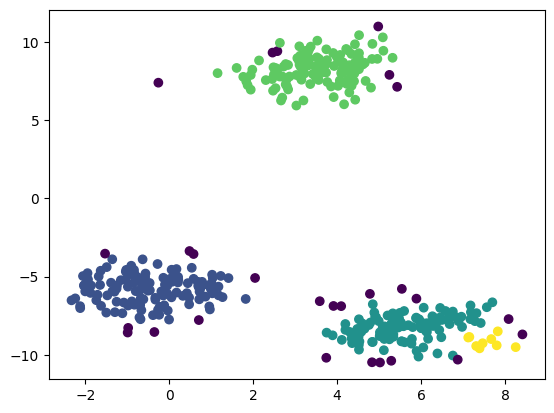

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=4).fit(data2[0])
print(np.unique(dbscan.labels_))
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

[-1  0  1  2  3  4]


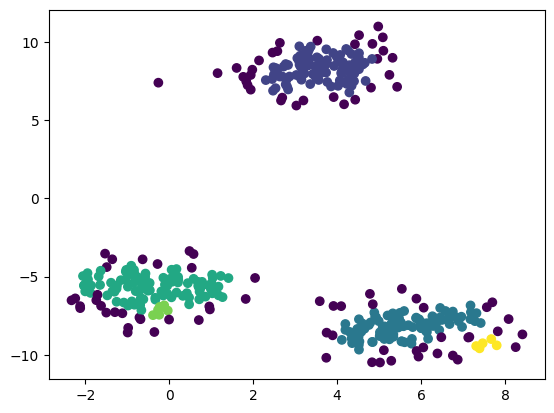

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='manhattan').fit(data2[0])
print(np.unique(dbscan.labels_))
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

Датасет 3

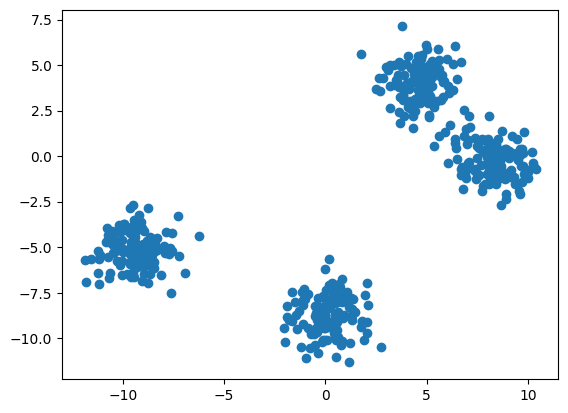

In [ ]:
plt.scatter(data3[0][:,0], data3[0][:,1])

In [ ]:
kmeans_3 = KMeans(4, n_init='auto').fit(data3[0])

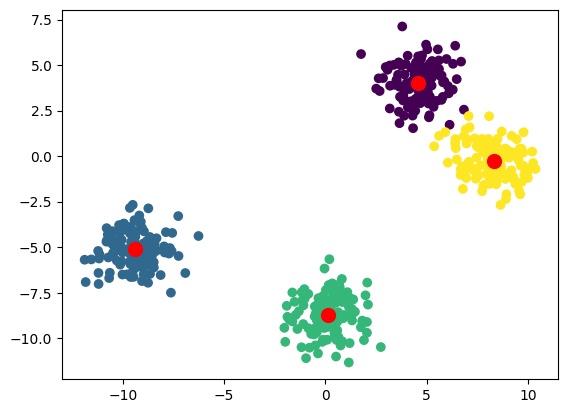

In [ ]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=kmeans_3.labels_)
plt.scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], s=100, c='red')

In [ ]:
inertias3 = []

for i in range(2, 11):
  km = KMeans(i, n_init='auto').fit(data3[0])
  inertias3.append(km.inertia_)

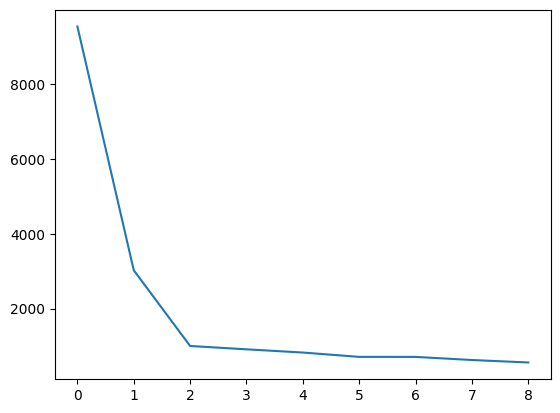

In [ ]:
plt.plot(inertias3)

In [ ]:
silhouette_score(data3[0], kmeans_3.labels_)

0.7521150202016956

In [ ]:
ss3 = []

for i in range(2, 11):
  ss3.append(silhouette_score(data3[0], KMeans(i, n_init='auto').fit(data3[0]).labels_))

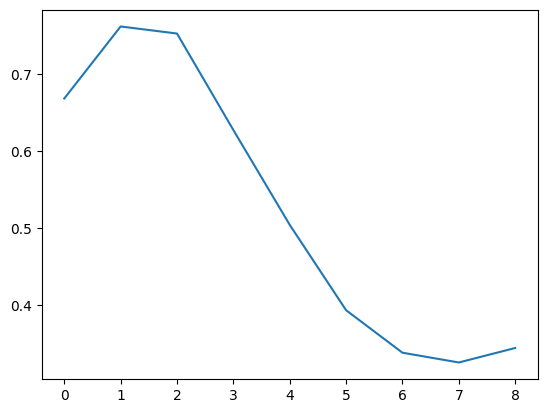

In [ ]:
plt.plot(ss3)

In [ ]:
dbscan = DBSCAN().fit(data3[0])
print(np.unique(dbscan.labels_))


[-1  0  1  2  3  4  5  6  7]


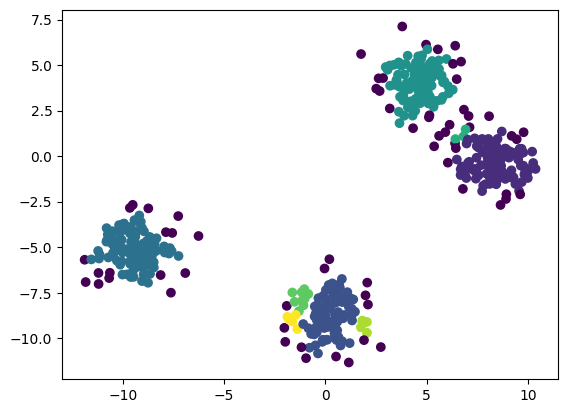

In [ ]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


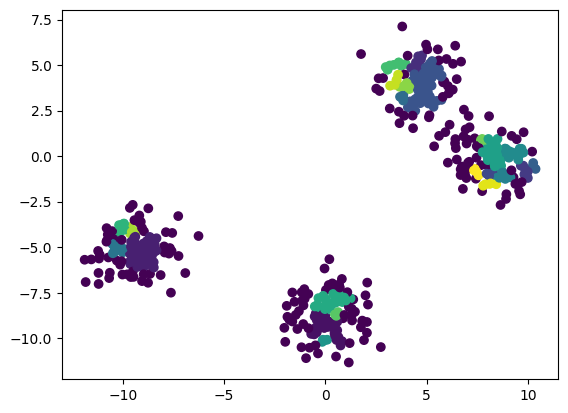

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=4).fit(data3[0])
print(np.unique(dbscan.labels_))
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

In [ ]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data3[0])
distances, indices = nbrs.kneighbors(data3[0])

In [ ]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

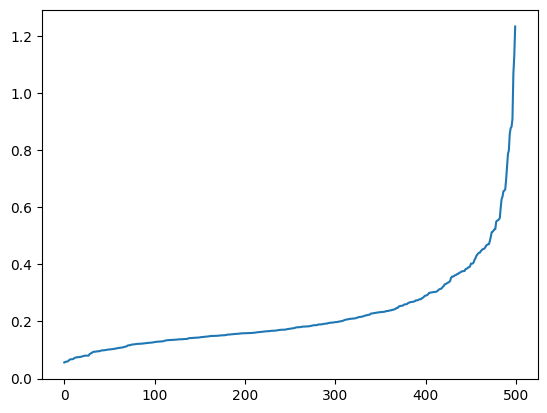

In [ ]:
plt.plot(distances)

[-1  0  1  2  3]


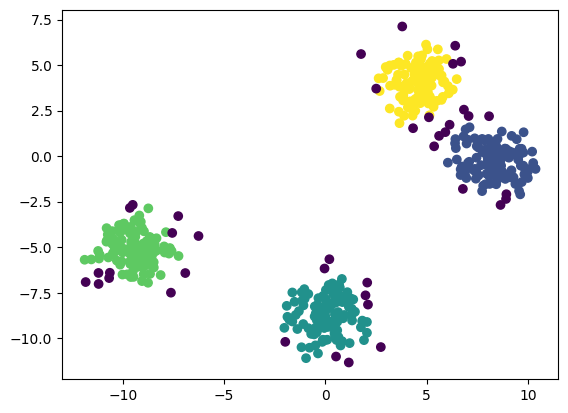

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=4).fit(data3[0])
print(np.unique(dbscan.labels_))
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

[-1  0  1  2  3]


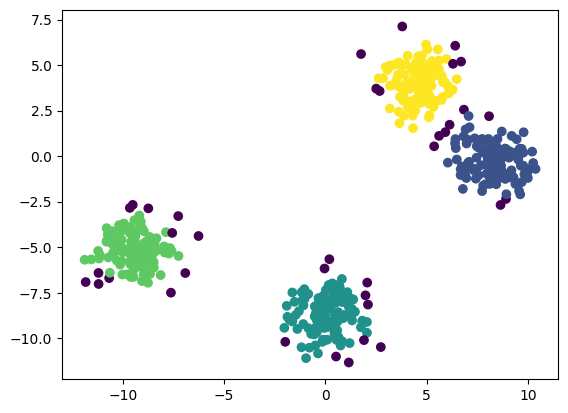

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='manhattan').fit(data3[0])
print(np.unique(dbscan.labels_))
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

##Задание 3

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []


    def fit_predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()
        # классификация выборки как индекс их кластеров
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # присваивание среднего значения кластеров центроидам
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def inertia(self):
        dis = []
        for i, index in enumerate(self.clusters):
            sample = self.X[index].T
            for j in range(0, len(sample[0])):
              dis.append(euclidean_distance((sample[0][j],sample[1][j]), self.centroids[i]))
        itog = [x ** 2 for x in dis]
        return sum(itog)

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


2


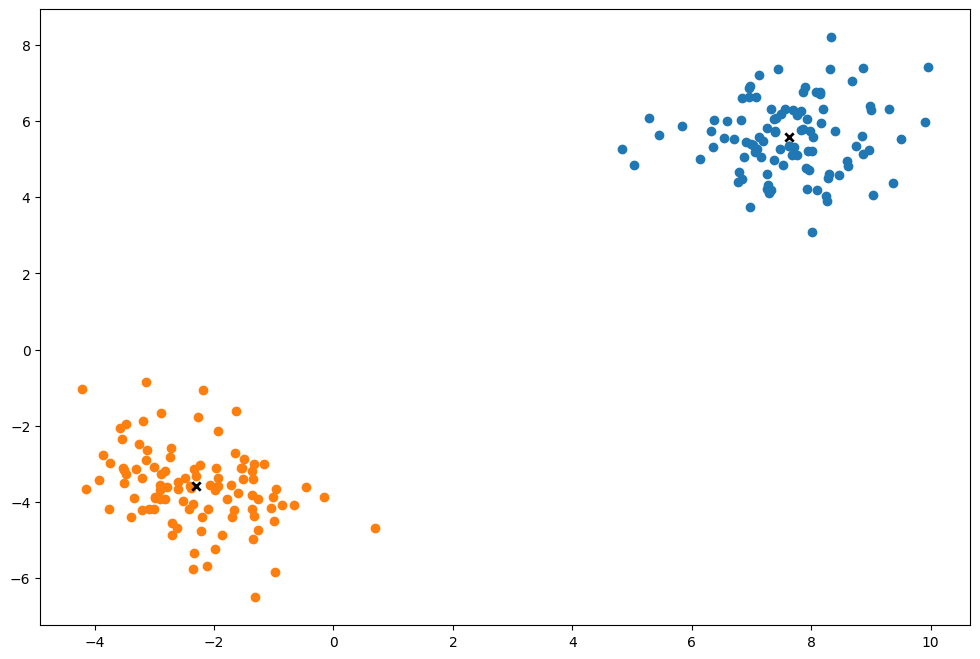

In [ ]:
clusters = len(np.unique(data1[1]))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=False)
k.fit_predict(data1[0])

k.plot()

In [ ]:
kmeans_1.inertia_

371.18117918901976

In [ ]:
k.inertia()

371.1811791890201